In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04210c4e98be731b35089f9bbea2eb9c


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | argentan
Processing Record 7 of Set 1 | garowe
Processing Record 8 of Set 1 | san jose de tarros
Processing Record 9 of Set 1 | nouakchott
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | margate
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | porosozero
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | nhulunbuy
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | avera
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | kodi

Processing Record 40 of Set 4 | cortez
Processing Record 41 of Set 4 | crawley
Processing Record 42 of Set 4 | aflu
City not found. Skipping...
Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | yellowknife
Processing Record 46 of Set 4 | atchison
Processing Record 47 of Set 4 | banyo
Processing Record 48 of Set 4 | najran
Processing Record 49 of Set 4 | kupang
Processing Record 50 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 1 of Set 5 | pakwach
City not found. Skipping...
Processing Record 2 of Set 5 | goundam
Processing Record 3 of Set 5 | xuddur
Processing Record 4 of Set 5 | karaul
City not found. Skipping...
Processing Record 5 of Set 5 | elko
Processing Record 6 of Set 5 | castro
Processing Record 7 of Set 5 | owando
Processing Record 8 of Set 5 | russell
Processing Record 9 of Set 5 | marrakesh
Processing Record 10 of Set 5 | pangnirtung
Processing Record 11 of Set 5 | tuatapere
Processing 

Processing Record 30 of Set 8 | turtas
Processing Record 31 of Set 8 | mollendo
Processing Record 32 of Set 8 | verkhnetulomskiy
Processing Record 33 of Set 8 | ayan
Processing Record 34 of Set 8 | grajau
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | parrsboro
Processing Record 37 of Set 8 | gladstone
Processing Record 38 of Set 8 | novyy urgal
Processing Record 39 of Set 8 | miri
Processing Record 40 of Set 8 | sangar
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | chokwe
Processing Record 43 of Set 8 | kohima
Processing Record 44 of Set 8 | kodinsk
Processing Record 45 of Set 8 | kaka
Processing Record 46 of Set 8 | waimalu
Processing Record 47 of Set 8 | balkanabat
Processing Record 48 of Set 8 | vanavara
Processing Record 49 of Set 8 | ternate
Processing Record 50 of Set 8 | el dorado
Processing Record 1 of Set 9 | ucluelet
Processing Record 2 of Set 9 | krasnoyarsk-45
City not found. Skipping...
Processing Record 3 of Se

Processing Record 12 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 13 of Set 12 | tura
Processing Record 14 of Set 12 | san martin
Processing Record 15 of Set 12 | luancheng
Processing Record 16 of Set 12 | yumen
Processing Record 17 of Set 12 | te anau
Processing Record 18 of Set 12 | burnie
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | harigue
City not found. Skipping...
Processing Record 21 of Set 12 | prieska
Processing Record 22 of Set 12 | bridgend
Processing Record 23 of Set 12 | sangmelima
Processing Record 24 of Set 12 | iranshahr
Processing Record 25 of Set 12 | astana
Processing Record 26 of Set 12 | menongue
Processing Record 27 of Set 12 | yaring
Processing Record 28 of Set 12 | george town
Processing Record 29 of Set 12 | kasama
Processing Record 30 of Set 12 | plainview
Processing Record 31 of Set 12 | pachino
Processing Record 32 of Set 12 | saint-joseph
Processing Record 33 of Set 12 | mahabad
Processing Record 34 of Set

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,19.22,-104.70,77.00,94,20,5.82,MX,2020-09-12 14:08:34
1,Nome,64.50,-165.41,41.00,86,90,3.36,US,2020-09-12 14:04:03
2,Mataura,-46.19,168.86,48.00,83,100,5.35,NZ,2020-09-12 14:08:34
3,Mount Isa,-20.73,139.50,66.20,32,0,1.12,AU,2020-09-12 14:08:34
4,Ushuaia,-54.80,-68.30,37.40,86,40,5.82,AR,2020-09-12 14:08:35
5,Argentan,48.75,-0.02,69.80,52,0,4.70,FR,2020-09-12 14:08:35
6,Garowe,8.41,48.48,95.65,28,71,17.72,SO,2020-09-12 14:08:35
7,San Jose De Tarros,15.30,-88.70,77.00,94,75,1.74,HN,2020-09-12 14:08:35
8,Nouakchott,18.09,-15.98,91.40,66,40,14.99,MR,2020-09-12 14:08:35
9,Saint-Philippe,-21.36,55.77,73.40,73,40,21.92,RE,2020-09-12 14:08:35


In [17]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        561 non-null    object 
 1   Lat         561 non-null    float64
 2   Lng         561 non-null    float64
 3   Max Temp    561 non-null    float64
 4   Humidity    561 non-null    int64  
 5   Cloudiness  561 non-null    int64  
 6   Wind Speed  561 non-null    float64
 7   Country     561 non-null    object 
 8   Date        561 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.6+ KB


In [19]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,MX,2020-09-12 14:08:34,19.22,-104.70,77.00,94,20,5.82
1,Nome,US,2020-09-12 14:04:03,64.50,-165.41,41.00,86,90,3.36
2,Mataura,NZ,2020-09-12 14:08:34,-46.19,168.86,48.00,83,100,5.35
3,Mount Isa,AU,2020-09-12 14:08:34,-20.73,139.50,66.20,32,0,1.12
4,Ushuaia,AR,2020-09-12 14:08:35,-54.80,-68.30,37.40,86,40,5.82
5,Argentan,FR,2020-09-12 14:08:35,48.75,-0.02,69.80,52,0,4.70
6,Garowe,SO,2020-09-12 14:08:35,8.41,48.48,95.65,28,71,17.72
7,San Jose De Tarros,HN,2020-09-12 14:08:35,15.30,-88.70,77.00,94,75,1.74
8,Nouakchott,MR,2020-09-12 14:08:35,18.09,-15.98,91.40,66,40,14.99
9,Saint-Philippe,RE,2020-09-12 14:08:35,-21.36,55.77,73.40,73,40,21.92


In [20]:
# Create output file (CSV)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1599921193.5492558

In [23]:
#today = time.time()
today = time.strftime("%x")
today

'09/12/20'

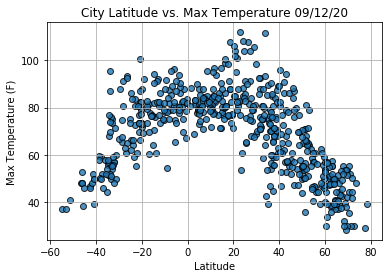

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

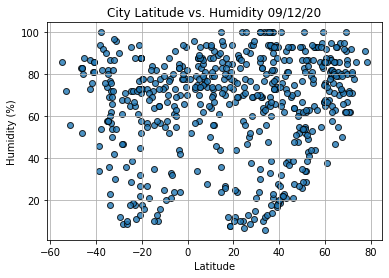

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

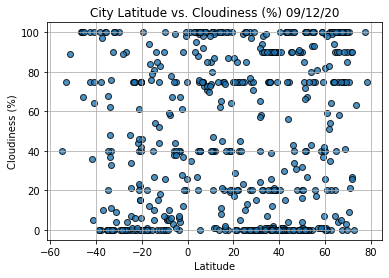

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

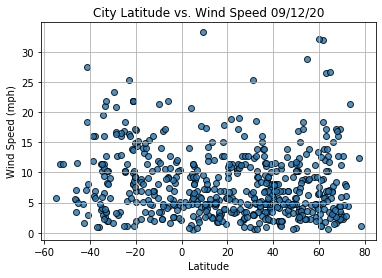

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()